In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import torch

import sys
sys.path.append('./..')
from logistic import DLogistic

In [4]:
def make_knots(k, y_k, h_d, s):
    # Make 2-sided integer relaxation around k, which integrates to y_k
    x = torch.linspace(k-0.5, k+0.5, 7)
    h_k = (2 * y_k - h_d/3)
    h = torch.full_like(x, h_k)
    h_scale = torch.Tensor([0, s, 1-s, 1, 1-s, s, 0])
    h = h * h_scale
    h[0] += h_d
    h[-1] += h_d
    return x, h

def get_area(k, y):
    # To test if spline is normalized.
    area = 0
    for i in range(len(k)-1):
        area += (k[i+1] - k[i]) * (y[i] + y[i+1]) / 2
    return area

def plot_logistic(loc, scale, alpha, g0, gk):
    k = torch.arange(g0, gk + 1).view(1, -1)
    p = DLogistic(loc, scale, alpha, g0, gk).pmf(k)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_figwidth(15)
    ax1.stem(k[0], p[0])
    ax1.set_ylim([0, p.max() + 0.05])


    x = []
    y = []
    h_d = 1e-6
    s = 0.01
    for i in range(len(k[0])):
        x_i, y_i = make_knots(k[0, i].item(), p[0, i].item(), h_d, s)
        if i < len(k[0]) - 1:
            x_i = x_i[:-1]
            y_i = y_i[:-1]
        x.append(x_i)
        y.append(y_i)

    x = torch.cat(x)
    y = torch.cat(y)
    ax2.plot(x, y)
    plt.title(f"DLogistic({loc.item():.3f}, {scale.item():.3f})")
    plt.show()

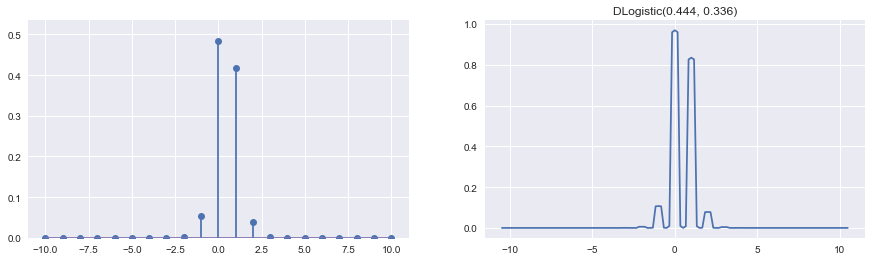

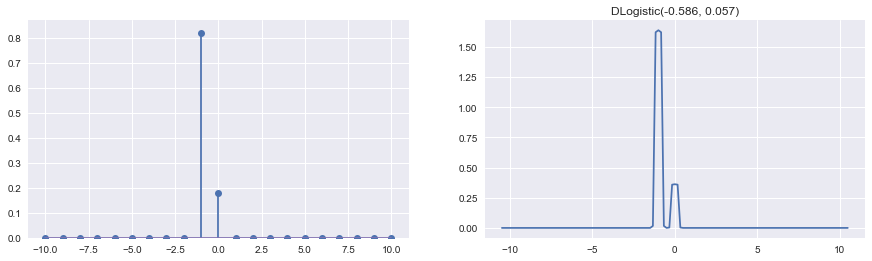

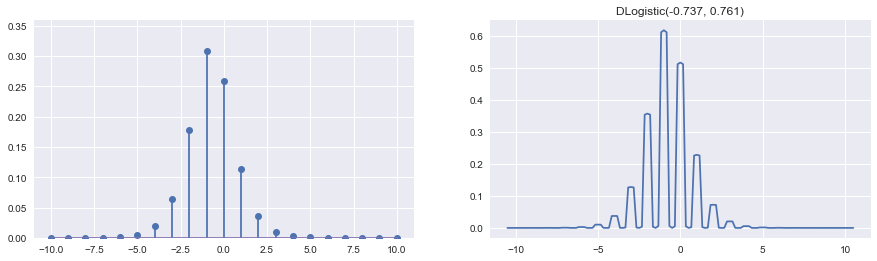

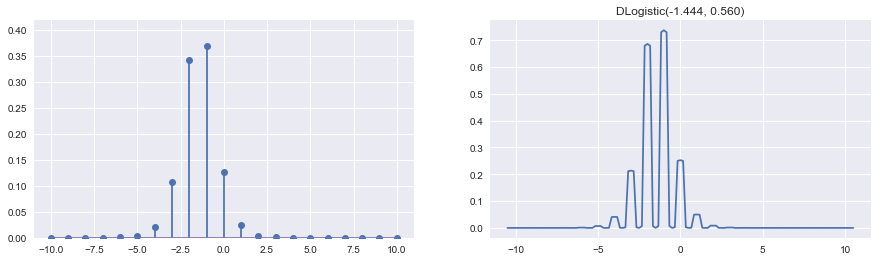

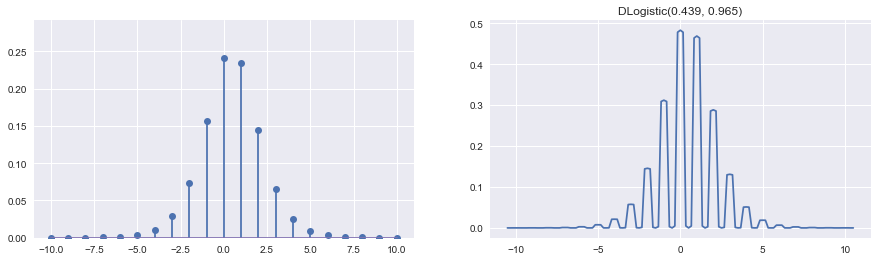

In [5]:
for _ in range(5):
    loc = torch.randn(1, 1)
    scale = torch.rand(1, 1)
    plot_logistic(loc, scale, 1, -10, 10)